In [161]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

inward = pd.read_csv('D:/2probe/clean/micro+nano electro/inward_cut_back.csv')
reverse = pd.read_csv('D:/2probe/clean/micro+nano electro/reverse_cut_back.csv')

In [162]:
len(inward)

88931

In [163]:
len(reverse)

82865

In [164]:
inward.head()

,time,R
0,0.00000,6.85344
1,0.42612,6.85030
2,0.85212,6.84846
3,1.27811,6.84660
4,1.70410,6.84514


In [165]:
inward.head()

,time,R
0,0.00000,6.85344
1,0.42612,6.85030
2,0.85212,6.84846
3,1.27811,6.84660
4,1.70410,6.84514


In [166]:

reverse.tail()

,time,R
82860,35303.19710,9.482286
82861,35303.62310,9.482892
82862,35304.05011,9.482316
82863,35304.47611,9.482131
82864,35304.90109,9.481621


In [167]:
#inward.to_csv('D:/2probe/clean/micro+nano electro/inward_cut_back.csv', index = False)
#reverse.to_csv('D:/2probe/clean/micro+nano electro/reverse_cut_back.csv', index = False)

In [168]:
T=33.73
P1=1000
P2=1000
accuracy=1.0  #lowest and highest point in every cycle is not a single point
# it is in fact average of several measuremnts during 1.0s, to avoid outlier

In [169]:
def low_high1(inward):
    low=[]
    high=[]
    low_ave=[]
    high_ave=[]
    
    low_start=T/2.0
    high_start=T
    for i in range(P1):
        low.append(inward.loc[(inward['time']>low_start-(accuracy/2.0))&(inward['time']<low_start+(accuracy/2.0)),'R'].mean())
        high.append(inward.loc[(inward['time']>high_start-(accuracy/2.0))&(inward['time']<high_start+(accuracy/2.0)),'R'].mean())
        low_start+=T
        high_start+=T
        if i%50==49:
            low_ave.append(np.average(low[i-49:i+1]))
            high_ave.append(np.average(high[i-49:i+1]))
        
    return low,high,low_ave,high_ave

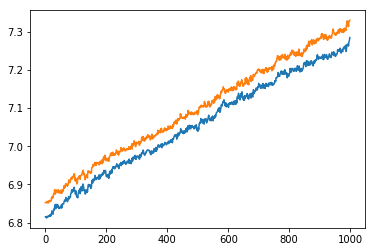

In [170]:
low,high,low_ave,high_ave=low_high1(inward)
#plot lowest and highest point of every cycle
plt.plot(low)
plt.plot(high)

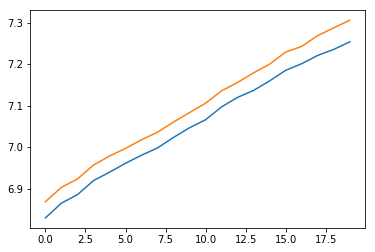

In [171]:
#plot average oflowest and highest point of every 50 cycles
plt.plot(low_ave)
plt.plot(high_ave)

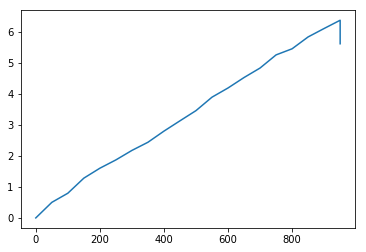

In [172]:
cycle=list(range(len(high_ave)))
cycle.append(len(high_ave)-1)
high_ave.append(low_ave[-1])
df=pd.DataFrame({'No. of cycles':cycle,'R':high_ave})
origin=df['R'][0]
df['R']=(df['R']/origin-1)*100
df['No. of cycles']*=50
plt.plot(df['No. of cycles'],df['R'])
df.to_csv('D:/2probe/clean/micro+nano electro/inward_to_first_high.csv', index = False)

In [173]:
def low_high2(reverse):
    low=[]
    high=[]
    low_ave=[]
    high_ave=[]
    
    low_start=T
    high_start=T/2.0
    for i in range(P1):
        low.append(reverse.loc[(reverse['time']>low_start-(accuracy/2.0))&(reverse['time']<low_start+(accuracy/2.0)),'R'].mean())
        high.append(reverse.loc[(reverse['time']>high_start-(accuracy/2.0))&(reverse['time']<high_start+(accuracy/2.0)),'R'].mean())
        low_start+=T
        high_start+=T
        if i%50==49:
            low_ave.append(np.average(low[i-49:i+1]))
            high_ave.append(np.average(high[i-49:i+1]))
        
    return low,high,low_ave,high_ave

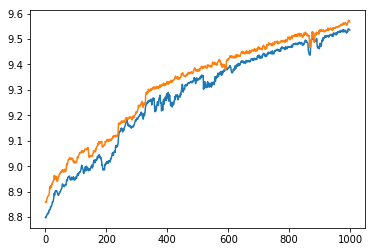

In [174]:
low,high,low_ave,high_ave=low_high2(reverse)

plt.plot(low)
plt.plot(high)

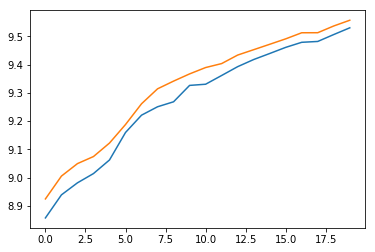

In [175]:
plt.plot(low_ave)
plt.plot(high_ave)

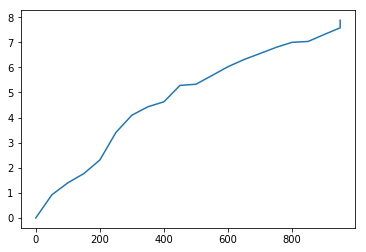

In [176]:
cycle=list(range(len(low_ave)))
cycle.append(len(low_ave)-1)
low_ave.append(high_ave[-1])
df=pd.DataFrame({'No. of cycles':cycle,'R':low_ave})
origin=df['R'][0]
df['R']=(df['R']/origin-1)*100
df['No. of cycles']*=50
plt.plot(df['No. of cycles'],df['R'])
df.to_csv('D:/2probe/clean/micro+nano electro/reverse_to_first_low.csv', index = False)